In [5]:
import os
import statistics
from typing import Dict, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
def load_csv_result_data_variant_counts(optimization, scenario, variant_counts, scale_factor):
    result_df = None
    for variant_count in variant_counts:
        filepath = f"./optimization-benchmark-results/" \
                   f"results-{optimization}-{scenario}-{variant_count}-{scale_factor}.csv"
        new_df = pd.read_csv(filepath)
        repeats = new_df.shape[0]
        median_no_opt = new_df['analysis_result_without_any_opt'].median()
        # avg_baseline_variant_execution = median_no_opt / variant_count
        new_df['original_pipeline'] = new_df['original_pipeline'].median()
        for column in new_df.columns:
            if column.startswith("analysis_result"):
                new_df[column] = median_no_opt / new_df[column].median()
        new_df = new_df.head(1)
        new_df['repeats'] = repeats
        new_df['variant_count'] = variant_count
        if result_df is None:
            result_df = new_df
        else:
            result_df = pd.concat([result_df, new_df], axis=0)
    return result_df

def load_csv_result_data_scale_factors(optimization, scenario, scale_factors, variant_count):
    result_df = None
    for scale_factor in scale_factors:
        filepath = f"./optimization-benchmark-results/" \
                   f"results-{optimization}-{scenario}-{variant_count}-{scale_factor}.csv"
        new_df = pd.read_csv(filepath)
        repeats = new_df.shape[0]
        median_no_opt = new_df['analysis_result_without_any_opt'].median()
        # avg_baseline_variant_execution = median_no_opt / variant_count
        new_df['original_pipeline'] = new_df['original_pipeline'].median()
        for column in new_df.columns:
            if column.startswith("analysis_result"):
                new_df[column] = median_no_opt / new_df[column].median()
        new_df = new_df.head(1)
        new_df['repeats'] = repeats
        new_df['variant_count'] = variant_count
        if result_df is None:
            result_df = new_df
        else:
            result_df = pd.concat([result_df, new_df], axis=0)
    return result_df

In [7]:
def plot_runtimes(scenario_name_to_named_metrics: Dict[str, Tuple[float, float]],
                  variant_counts, title):

    markersize = 12

    #plt.plot(1.0 / epsilons, adult_means / np.min(adult_means), 'o-', markersize=markersize)

    # plt.plot(variant_counts, np.array(orig), linestyle='dotted', color='grey')
    # styles = [{'color': 'tab:green'}, {'color': 'tab:blue'}, {'color': 'tab:red'}, {'color': 'tab:orange'}, {'color': 'tab:red', 'linestyle': 'dashed'}, {'color': 'tab:purple', 'linestyle': 'dashed'}]
    styles = [{'color': 'tab:green'}, {'color': 'tab:blue'}, {'color': 'tab:red'}, {'color': 'tab:orange'}, {'color': 'tab:pink'}, {'color': 'tab:purple'}]


    for (scenario, (metric_with_opt, metric_witout_opt)), style in zip(scenario_name_to_named_metrics.items(), styles):
        plt.plot(variant_counts, np.array(metric_with_opt), **style)
        # plt.plot(variant_counts, np.array(metric_witout_opt), linestyle='dashed', color=color)


    #plt.ylim((0.9, 5.999))
    # plt.grid()
    # plt.gca().set_aspect("equal")

    plt.ylabel('speedup', fontsize=26)
    plt.xlabel('# variants', fontsize=26)
    legend_names = []
    for scenario_name in scenario_name_to_named_metrics.keys():
        legend_names.append(f"{scenario_name}")  #  w/ opt.
        #legend_names.append(f"{scenario_name} w/o opt.")
    plt.legend(legend_names, loc='upper left',
               #, title="inspections", title_fontsize=16,
               fontsize=15, ncol=1)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)

    #plt.xticks(variant_counts[1:], rotation=45, fontsize=24)
    plt.xticks(variant_counts, rotation=0, fontsize=24)
    # plt.xticks(list(range(2, variant_counts[-1])), rotation=0, fontsize=24)

    plt.yticks(list(range(variant_counts[-1])))
    plt.ylim(0, variant_counts[-1])
    #plt.yscale('log')
    #plt.xscale('log')


    #plt.title(title, fontsize=26)

    plt.gcf().set_size_inches(8, 6)
    plt.tight_layout()

    current_directory = os.getcwd()
    output_directory = os.path.join(current_directory, r'figures')
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    plt.gcf().savefig(f'./figures/{title}.pdf', dpi=300)
    plt.show()

In [8]:
optimization = "common_subexpression_elimination"
variant_counts = [2, 4]
row_count = "1.0"
ideal_df = load_csv_result_data_variant_counts(optimization, "ideal", variant_counts, row_count)
average_df = load_csv_result_data_variant_counts(optimization, "average", variant_counts, row_count)
worst_df = load_csv_result_data_variant_counts(optimization, "worst", variant_counts, row_count)
plot_runtimes({'beneficial scenario': (ideal_df['analysis_result_with_opt'], ideal_df['analysis_result_without_any_opt']),
               'standard scenario': (average_df['analysis_result_with_opt'], average_df['analysis_result_without_any_opt']),
               'adversarial scenario': (worst_df['analysis_result_with_opt'], worst_df['analysis_result_without_any_opt'])},
              variant_counts,
              f"{optimization}_variant_counts")

FileNotFoundError: [Errno 2] No such file or directory: './optimization-benchmark-results/results-common_subexpression_elimination-average-2-1.0.csv'

In [ ]:
optimization = "projection_push_up"
variant_counts = [2, 4, 6]
row_count = "1.0"
ideal_df = load_csv_result_data_variant_counts(optimization, "ideal", variant_counts, row_count)
average_df = load_csv_result_data_variant_counts(optimization, "average", variant_counts, row_count)
worst_df = load_csv_result_data_variant_counts(optimization, "worst", variant_counts, row_count)
plot_runtimes({'beneficial scenario': (ideal_df['analysis_result_with_opt_rule'], ideal_df['analysis_result_without_any_opt']),
               'standard scenario': (average_df['analysis_result_with_opt_rule'], average_df['analysis_result_without_any_opt']),
               'adversarial scenario': (worst_df['analysis_result_with_opt_rule'], worst_df['analysis_result_without_any_opt'])},
              variant_counts,
              f"{optimization}_variant_counts")

In [ ]:
optimization = "udf_split_and_reuse"
variant_counts = [2, 4, 6]
row_count = "1.0"
ideal_df = load_csv_result_data_variant_counts(optimization, "ideal", variant_counts, row_count)
average_df = load_csv_result_data_variant_counts(optimization, "average", variant_counts, row_count)
worst_df = load_csv_result_data_variant_counts(optimization, "worst_w_safety", variant_counts, row_count)
plot_runtimes({'beneficial scenario': (ideal_df['analysis_result_with_reuse_opt_rule'], ideal_df['analysis_result_without_any_opt']),
               'standard scenario': (average_df['analysis_result_with_reuse_opt_rule'], average_df['analysis_result_without_any_opt']),
               'adversarial scenario': (worst_df['analysis_result_with_reuse_opt_rule'], worst_df['analysis_result_without_any_opt'])},
              variant_counts,
              f"{optimization}_variant_counts")

In [ ]:
optimization = "filter_addition_push_up"
variant_counts = [2, 4, 6]
row_count = "1.0"
ideal_df = load_csv_result_data_variant_counts(optimization, "ideal", variant_counts, row_count)
average_df = load_csv_result_data_variant_counts(optimization, "average", variant_counts, row_count)
worst_wo_original_df = load_csv_result_data_variant_counts(optimization, "worst_wo_original", variant_counts, row_count)
worst_w_original_df = load_csv_result_data_variant_counts(optimization, "worst_w_original", variant_counts, row_count)
plot_runtimes({'beneficial scenario': (ideal_df['analysis_result_with_opt_rule'], ideal_df['analysis_result_without_any_opt']),
               'standard scenario': (average_df['analysis_result_with_opt_rule'], average_df['analysis_result_without_any_opt']),
               'adversarial: w/o original': (worst_wo_original_df['analysis_result_with_opt_rule'], worst_wo_original_df['analysis_result_without_any_opt']),
               'adversarial: w/ original': (worst_w_original_df['analysis_result_with_opt_rule'], worst_w_original_df['analysis_result_without_any_opt'])},
              variant_counts,
              f"{optimization}_variant_counts")

In [ ]:
optimization = "operator_deletion_filter_push_up"
variant_counts = [2, 4, 6]
row_count = "1.0"
ideal_df = load_csv_result_data_variant_counts(optimization, "ideal", variant_counts, row_count)
average_df = load_csv_result_data_variant_counts(optimization, "average", variant_counts, row_count)
worst_wo_safety_df = load_csv_result_data_variant_counts(optimization, "worst_wo_safety", variant_counts, row_count)
worst_w_safety_df = load_csv_result_data_variant_counts(optimization, "worst_w_safety", variant_counts, row_count)
worst_safety_too_defensive_df = load_csv_result_data_variant_counts(optimization, "worst_safety_too_defensive", variant_counts, row_count)
worst_case_only_some_filters_worth_pushing_up_df = load_csv_result_data_variant_counts(optimization, "worst_case_only_some_filters_worth_pushing_up", variant_counts, row_count)
plot_runtimes({'beneficial scenario': (ideal_df['analysis_result_with_opt_rule'], ideal_df['analysis_result_without_any_opt']),
               'standard scenario': (average_df['analysis_result_with_opt_rule'], average_df['analysis_result_without_any_opt']),
               'adversarial: w/o safety': (worst_wo_safety_df['analysis_result_with_opt_rule'], worst_wo_safety_df['analysis_result_without_any_opt']),
               'adversarial: w/ safety': (worst_w_safety_df['analysis_result_with_opt_rule'], worst_w_safety_df['analysis_result_without_any_opt']),
               'adversarial: safety too defensive': (worst_safety_too_defensive_df['analysis_result_with_opt_rule'], worst_safety_too_defensive_df['analysis_result_without_any_opt']),
               'adversarial: only some filters worth pushing up': (worst_case_only_some_filters_worth_pushing_up_df['analysis_result_with_opt_rule'], worst_case_only_some_filters_worth_pushing_up_df['analysis_result_without_any_opt'])
               },
              variant_counts,
              f"{optimization}_variant_counts")

In [ ]:
optimization = "common_subexpression_elimination"
scale_factors = [0.5, 1.0]
variant_count = 4
ideal_df = load_csv_result_data_scale_factors(optimization, "ideal", scale_factors, variant_count)
average_df = load_csv_result_data_scale_factors(optimization, "average", scale_factors, variant_count)
worst_df = load_csv_result_data_scale_factors(optimization, "worst", scale_factors, variant_count)
plot_runtimes({'beneficial scenario': (ideal_df['analysis_result_with_opt'], ideal_df['analysis_result_without_any_opt']),
               'standard scenario': (average_df['analysis_result_with_opt'], average_df['analysis_result_without_any_opt']),
               'adversarial scenario': (worst_df['analysis_result_with_opt'], worst_df['analysis_result_without_any_opt'])},
              variant_counts,
              f"{optimization}_scale_factors")

In [ ]:
optimization = "projection_push_up"
scale_factors = [0.5, 1.0]
variant_count = 4
ideal_df = load_csv_result_data_scale_factors(optimization, "ideal", scale_factors, variant_count)
average_df = load_csv_result_data_scale_factors(optimization, "average", scale_factors, variant_count)
worst_df = load_csv_result_data_scale_factors(optimization, "worst", scale_factors, variant_count)
plot_runtimes({'beneficial scenario': (ideal_df['analysis_result_with_opt_rule'], ideal_df['analysis_result_without_any_opt']),
               'standard scenario': (average_df['analysis_result_with_opt_rule'], average_df['analysis_result_without_any_opt']),
               'adversarial scenario': (worst_df['analysis_result_with_opt_rule'], worst_df['analysis_result_without_any_opt'])},
              variant_counts,
              f"{optimization}_scale_factors")


In [ ]:
optimization = "udf_split_and_reuse"
scale_factors = [0.5, 1.0]
variant_count = 4
ideal_df = load_csv_result_data_scale_factors(optimization, "ideal", scale_factors, variant_count)
average_df = load_csv_result_data_scale_factors(optimization, "average", scale_factors, variant_count)
worst_df = load_csv_result_data_scale_factors(optimization, "worst_w_safety", scale_factors, variant_count)
plot_runtimes({'beneficial scenario': (ideal_df['analysis_result_with_reuse_opt_rule'], ideal_df['analysis_result_without_any_opt']),
               'standard scenario': (average_df['analysis_result_with_reuse_opt_rule'], average_df['analysis_result_without_any_opt']),
               'adversarial scenario': (worst_df['analysis_result_with_reuse_opt_rule'], worst_df['analysis_result_without_any_opt'])},
              variant_counts,
              f"{optimization}_scale_factors")

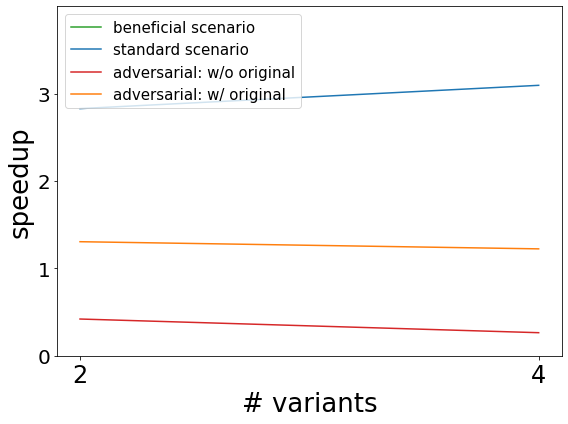

In [10]:
optimization = "filter_addition_push_up"
scale_factors = [0.5, 1.0]
variant_count = 4
ideal_df = load_csv_result_data_scale_factors(optimization, "ideal", scale_factors, variant_count)
average_df = load_csv_result_data_scale_factors(optimization, "average", scale_factors, variant_count)
worst_wo_original_df = load_csv_result_data_scale_factors(optimization, "worst_wo_original", scale_factors, variant_count)
worst_w_original_df = load_csv_result_data_scale_factors(optimization, "worst_w_original", scale_factors, variant_count)
plot_runtimes({'beneficial scenario': (ideal_df['analysis_result_with_opt_rule'], ideal_df['analysis_result_without_any_opt']),
               'standard scenario': (average_df['analysis_result_with_opt_rule'], average_df['analysis_result_without_any_opt']),
               'adversarial: w/o original': (worst_wo_original_df['analysis_result_with_opt_rule'], worst_wo_original_df['analysis_result_without_any_opt']),
               'adversarial: w/ original': (worst_w_original_df['analysis_result_with_opt_rule'], worst_w_original_df['analysis_result_without_any_opt'])},
              variant_counts,
              f"{optimization}_variant_counts")

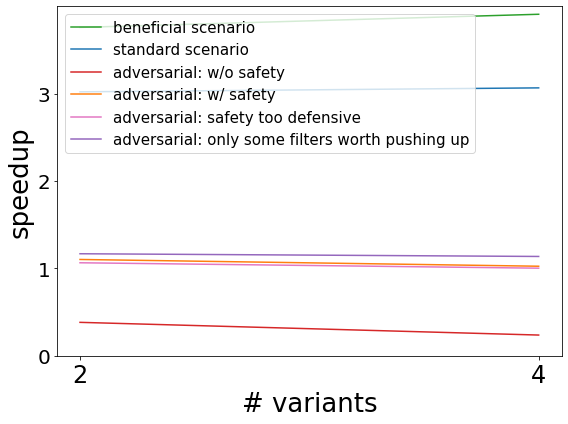

In [12]:
optimization = "operator_deletion_filter_push_up"
scale_factors = [0.5, 1.0]
variant_count = 4
ideal_df = load_csv_result_data_scale_factors(optimization, "ideal", scale_factors, variant_count)
average_df = load_csv_result_data_scale_factors(optimization, "average", scale_factors, variant_count)
worst_wo_safety_df = load_csv_result_data_scale_factors(optimization, "worst_wo_safety", scale_factors, variant_count)
worst_w_safety_df = load_csv_result_data_scale_factors(optimization, "worst_w_safety", scale_factors, variant_count)
worst_safety_too_defensive_df = load_csv_result_data_scale_factors(optimization, "worst_safety_too_defensive", scale_factors, variant_count)
worst_case_only_some_filters_worth_pushing_up_df = load_csv_result_data_scale_factors(optimization, "worst_case_only_some_filters_worth_pushing_up", scale_factors, variant_count)
plot_runtimes({'beneficial scenario': (ideal_df['analysis_result_with_opt_rule'], ideal_df['analysis_result_without_any_opt']),
               'standard scenario': (average_df['analysis_result_with_opt_rule'], average_df['analysis_result_without_any_opt']),
               'adversarial: w/o safety': (worst_wo_safety_df['analysis_result_with_opt_rule'], worst_wo_safety_df['analysis_result_without_any_opt']),
               'adversarial: w/ safety': (worst_w_safety_df['analysis_result_with_opt_rule'], worst_w_safety_df['analysis_result_without_any_opt']),
               'adversarial: safety too defensive': (worst_safety_too_defensive_df['analysis_result_with_opt_rule'], worst_safety_too_defensive_df['analysis_result_without_any_opt']),
               'adversarial: only some filters worth pushing up': (worst_case_only_some_filters_worth_pushing_up_df['analysis_result_with_opt_rule'], worst_case_only_some_filters_worth_pushing_up_df['analysis_result_without_any_opt'])
               },
              variant_counts,
              f"{optimization}_scale_factors")